In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import DataFrame
import tensorflow as tf
from tensorflow.python.ops import rnn_cell
from keras.layers import Dense ,Dropout
from keras.layers import LSTM
from keras.models import Sequential
x = pd.read_csv('/home/arsal/Desktop/pixel_pos.csv', header=None)
df = pd.DataFrame(x)
df=df.T
df.head()

/home/arsal/.local/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


,0,1,2,3
0,1,1,0.62847,0.31111
1,1,2,0.55382,0.21944
2,1,3,0.70313,0.40000
3,1,4,0.73785,0.55278
4,1,5,0.32465,0.74306


In [2]:
numPed = np.size(np.unique(df[1]))
current_ped = 0
all_ped_data = {}
dataset_indices = []
for ped in range(1, numPed+1):
    trajectory = df[df.loc[:, 1] == ped]
    trajectory = trajectory.iloc[:, [3, 2, 0]]
    all_ped_data[current_ped + ped] = trajectory

In [3]:
data=all_ped_data[25]

data=data[0:28]
data

,3,2,0
256,0.87778,0.39757,501
262,0.86528,0.41840,511
268,0.85139,0.43403,521
274,0.83750,0.45312,531
281,0.82083,0.46701,541
288,0.80000,0.47743,551
294,0.78056,0.48958,561
300,0.75833,0.48958,571
306,0.73750,0.49479,581
312,0.71528,0.49306,591


In [12]:
x_train=np.array(data.iloc[0:,0:1][0:20])
y_train=np.array(data.iloc[0:,1:2][0:20])
x_test=data.iloc[0:,0:1][20:]
y_test=data.iloc[0:,1:2][20:]

y_train
x_train=x_train.ravel().reshape(5,4,1)
y_train=y_train.ravel().reshape(5,4)
x_train
y_train

x_test=np.array(x_test).ravel().reshape(2,4,1)
x_train
y_train.shape
x=data.iloc[0:,0:1]
y=data.iloc[0:,1:2]
x
y
# plt.plot(x_train.ravel(),y_train.ravel())
# plt.plot(x_test.ravel(),np.array(y_test).ravel())
x_train.shape
# y_train
x_test
y_test

,2
357,0.56424
360,0.57465
363,0.57465
368,0.58333
373,0.58333
378,0.59028
383,0.59375
388,0.59375


In [24]:
model=Sequential()
model.add(LSTM(256, input_shape=(4,1), input_dim=1))
model.add(Dense(4,activation='linear'))
model.compile(loss='mse',optimizer='adam')
model.summary()

/home/arsal/.local/lib/python3.5/site-packages/ipykernel_launcher.py:2: UserWarning: The `input_dim` and `input_length` arguments in recurrent layers are deprecated. Use `input_shape` instead.
  
/home/arsal/.local/lib/python3.5/site-packages/ipykernel_launcher.py:2: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(256, input_shape=(None, 1))`
  


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 256)               264192    
_________________________________________________________________
dense_3 (Dense)              (None, 4)                 1028      
Total params: 265,220
Trainable params: 265,220
Non-trainable params: 0
_________________________________________________________________


In [25]:
model.fit(x_train,y_train,epochs=400)

Epoch 1/400
5/5 [==============================] - 1s 120ms/step - loss: 0.2617
Epoch 2/400
5/5 [==============================] - 0s 3ms/step - loss: 0.2316
Epoch 3/400
5/5 [==============================] - 0s 2ms/step - loss: 0.2037
Epoch 4/400
5/5 [==============================] - 0s 3ms/step - loss: 0.1776
Epoch 5/400
5/5 [==============================] - 0s 2ms/step - loss: 0.1530
Epoch 6/400
5/5 [==============================] - 0s 2ms/step - loss: 0.1297
Epoch 7/400
5/5 [==============================] - 0s 3ms/step - loss: 0.1075
Epoch 8/400
5/5 [==============================] - 0s 3ms/step - loss: 0.0865
Epoch 9/400
5/5 [==============================] - 0s 2ms/step - loss: 0.0668
Epoch 10/400
5/5 [==============================] - 0s 2ms/step - loss: 0.0489
Epoch 11/400
5/5 [==============================] - 0s 3ms/step - loss: 0.0333
Epoch 12/400
5/5 [==============================] - 0s 2ms/step - loss: 0.0211
Epoch 13/400
5/5 [==============================] - 0s 3ms/

Epoch 105/400
5/5 [==============================] - 0s 2ms/step - loss: 0.0062
Epoch 106/400
5/5 [==============================] - 0s 2ms/step - loss: 0.0062
Epoch 107/400
5/5 [==============================] - 0s 2ms/step - loss: 0.0062
Epoch 108/400
5/5 [==============================] - 0s 2ms/step - loss: 0.0061
Epoch 109/400
5/5 [==============================] - 0s 2ms/step - loss: 0.0061
Epoch 110/400
5/5 [==============================] - 0s 2ms/step - loss: 0.0060
Epoch 111/400
5/5 [==============================] - 0s 2ms/step - loss: 0.0060
Epoch 112/400
5/5 [==============================] - 0s 3ms/step - loss: 0.0059
Epoch 113/400
5/5 [==============================] - 0s 2ms/step - loss: 0.0059
Epoch 114/400
5/5 [==============================] - 0s 2ms/step - loss: 0.0059
Epoch 115/400
5/5 [==============================] - 0s 2ms/step - loss: 0.0058
Epoch 116/400
5/5 [==============================] - 0s 2ms/step - loss: 0.0058
Epoch 117/400
5/5 [=====================

Epoch 208/400
5/5 [==============================] - 0s 2ms/step - loss: 0.0024
Epoch 209/400
5/5 [==============================] - 0s 3ms/step - loss: 0.0023
Epoch 210/400
5/5 [==============================] - 0s 2ms/step - loss: 0.0023
Epoch 211/400
5/5 [==============================] - 0s 2ms/step - loss: 0.0023
Epoch 212/400
5/5 [==============================] - 0s 2ms/step - loss: 0.0022
Epoch 213/400
5/5 [==============================] - 0s 3ms/step - loss: 0.0022
Epoch 214/400
5/5 [==============================] - 0s 3ms/step - loss: 0.0021
Epoch 215/400
5/5 [==============================] - 0s 3ms/step - loss: 0.0021
Epoch 216/400
5/5 [==============================] - 0s 2ms/step - loss: 0.0020
Epoch 217/400
5/5 [==============================] - 0s 2ms/step - loss: 0.0020
Epoch 218/400
5/5 [==============================] - 0s 2ms/step - loss: 0.0020
Epoch 219/400
5/5 [==============================] - 0s 2ms/step - loss: 0.0019
Epoch 220/400
5/5 [=====================

Epoch 308/400
5/5 [==============================] - 0s 2ms/step - loss: 1.8901e-04
Epoch 309/400
5/5 [==============================] - 0s 2ms/step - loss: 1.8890e-04
Epoch 310/400
5/5 [==============================] - 0s 2ms/step - loss: 1.8881e-04
Epoch 311/400
5/5 [==============================] - 0s 2ms/step - loss: 1.8872e-04
Epoch 312/400
5/5 [==============================] - 0s 2ms/step - loss: 1.8864e-04
Epoch 313/400
5/5 [==============================] - 0s 2ms/step - loss: 1.8857e-04
Epoch 314/400
5/5 [==============================] - 0s 2ms/step - loss: 1.8850e-04
Epoch 315/400
5/5 [==============================] - 0s 2ms/step - loss: 1.8844e-04
Epoch 316/400
5/5 [==============================] - 0s 2ms/step - loss: 1.8839e-04
Epoch 317/400
5/5 [==============================] - 0s 3ms/step - loss: 1.8834e-04
Epoch 318/400
5/5 [==============================] - 0s 2ms/step - loss: 1.8829e-04
Epoch 319/400
5/5 [==============================] - 0s 2ms/step - loss: 1.8

In [26]:
results=model.predict(x_test)

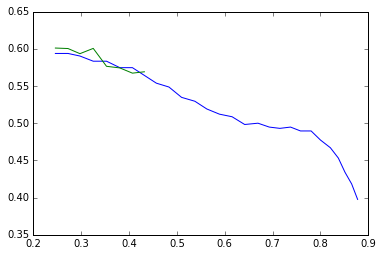

In [27]:
plt.plot(x,y)
plt.plot(x_test.ravel(),results.ravel())
# plt.plot(x_test.ravel(),np.array(y_test).ravel())
plt.show()